In [6]:
from myplotlib.plot_histogram             import plot_histogram_comp_methods
from myplotlib.plot_true_vs_error         import plot_true_vs_error
from myplotlib.plot_relative_net_spline   import plot_err_network_spline
from myplotlib.plot_relerr_to_tvalue      import plot_relerr_to_true_value
import numpy as np
import pickle

In [7]:
dir_list = np.loadtxt("../directory_list.txt", dtype = "str")
for idx in range(1, dir_list.size):
    print("{idx}. {dir}".format(idx=idx, dir=dir_list[idx]))

1. results/2in_3out/x_vx_Mvir_to_x_10layers_100neurons_tanhexp_BatchNorm_RE_1e-3lr_1000Epoch_Standardization_After_acc_trainMvir1e+8_testMvir1e+7_1/
2. results/2in_3out/x_vx_Mvir_to_x_10layers_100neurons_relu_BatchNorm_RE_1e-3lr_1000Epoch_Standardization_After_acc_trainMvir1e+8_testMvir1e+7_1/


parameter : x
most numbers of the data : (0.21073710381440283, 0.23664684534895922)
mode : 0.22369197458168102
most numbers of the data : (0.1180164226522293, 0.1325263259981784)
mode : 0.12527137432520385
most numbers of the data : (0.23664684534895922, 0.26574214222349385)
mode : 0.25119449378622655
most numbers of the data : (0.08334188315524851, 0.09358861528011168)
mode : 0.08846524921768009


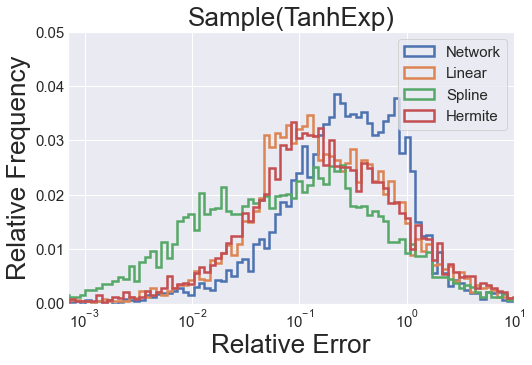

parameter : x
most numbers of the data : (0.16711736630290555, 0.1876641408787652)
mode : 0.1773907535908354
most numbers of the data : (0.1180164226522293, 0.1325263259981784)
mode : 0.12527137432520385
most numbers of the data : (0.23664684534895922, 0.26574214222349385)
mode : 0.25119449378622655
most numbers of the data : (0.08334188315524851, 0.09358861528011168)
mode : 0.08846524921768009


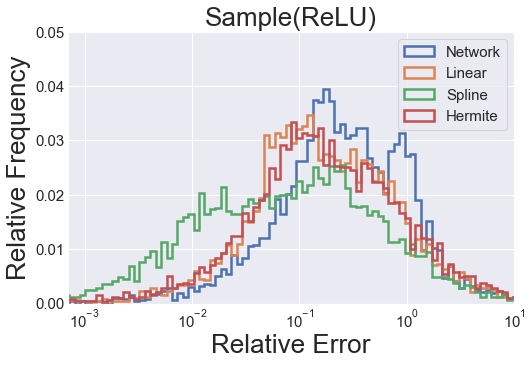

In [8]:
plot_dir = {"Sample(TanhExp)":1, "Sample(ReLU)":2} ## key:title, value:index of dir_list

for title, dir_idx in plot_dir.items():
    if dir_idx > dir_list.size-1:   continue
    with open("../" + dir_list[dir_idx] + "interpolate_array.pickle", mode = "rb") as f:
        interp      = pickle.load(f)
        parameter   = list(interp.keys())

        for p_key in parameter:
            print("parameter : {p_key}".format(p_key=p_key))
            for num in interp[p_key].keys():
                if num == 0:    continue
                loc = "upper right"
                methods = list(interp[p_key][num].keys())
                plot_histogram_comp_methods(interp[p_key][num], methods, title, loc=loc, xlim=[7e-4, 1e+1], ylim=[0, 0.05])

results/2in_3out/x_vx_Mvir_to_x_10layers_100neurons_tanhexp_BatchNorm_RE_1e-3lr_1000Epoch_Standardization_After_acc_trainMvir1e+8_testMvir1e+7_1/
parameter : x


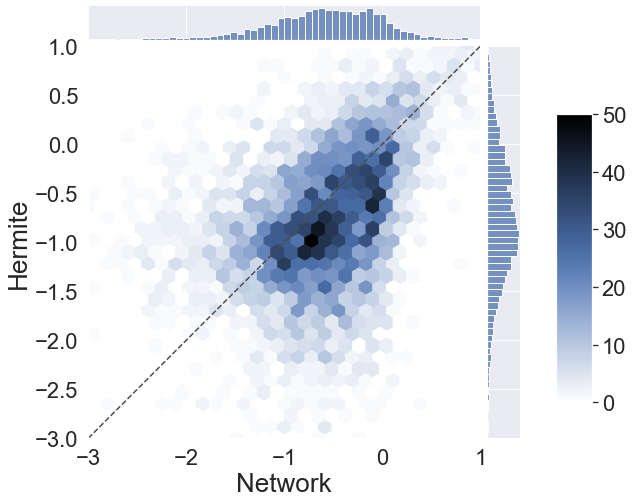

coefficient
[[1.         0.45044305]
 [0.45044305 1.        ]]
results/2in_3out/x_vx_Mvir_to_x_10layers_100neurons_relu_BatchNorm_RE_1e-3lr_1000Epoch_Standardization_After_acc_trainMvir1e+8_testMvir1e+7_1/
parameter : x


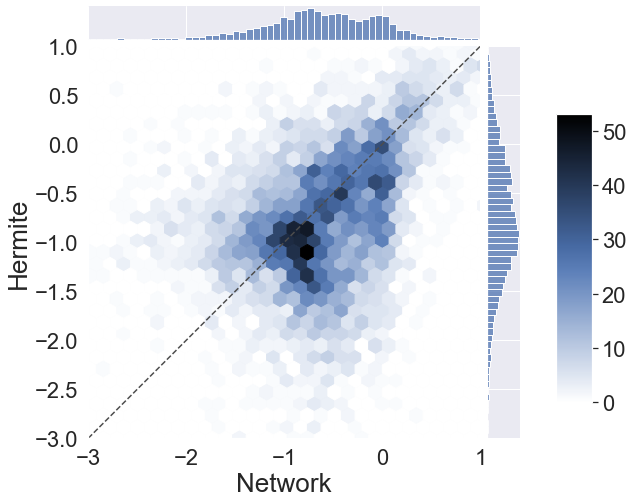

coefficient
[[1.         0.43361483]
 [0.43361483 1.        ]]


In [11]:
plot_dir = {"Sample(TanhExp)":1, "Sample(ReLU)":2} ## key:title, value:index of dir_list
methods     = ["model", "hermite"]  ## compare methods(choose from "model", "linear", "cubic", "hermite")

for title, dir_idx in plot_dir.items():
    direc = dir_list[dir_idx]
    print(direc)
    with open("../" + direc + "interpolate_array.pickle", mode = "rb") as f:
        interp      = pickle.load(f)
        parameter   = list(interp.keys())
        for p_key in parameter:
            print("parameter : {0}".format(p_key))
            for num in interp[p_key].keys():
                if num == 0:    continue
                coef = plot_err_network_spline(interp[p_key][num], methods=methods, bins=100, xlim=[-3, 1], ylim=[-3, 1], fontsize=26)
                print("coefficient\n{coef}".format(coef=coef))

results/2in_3out/x_vx_Mvir_to_x_10layers_100neurons_tanhexp_BatchNorm_RE_1e-3lr_1000Epoch_Standardization_After_acc_trainMvir1e+8_testMvir1e+7_1/
parameter : x


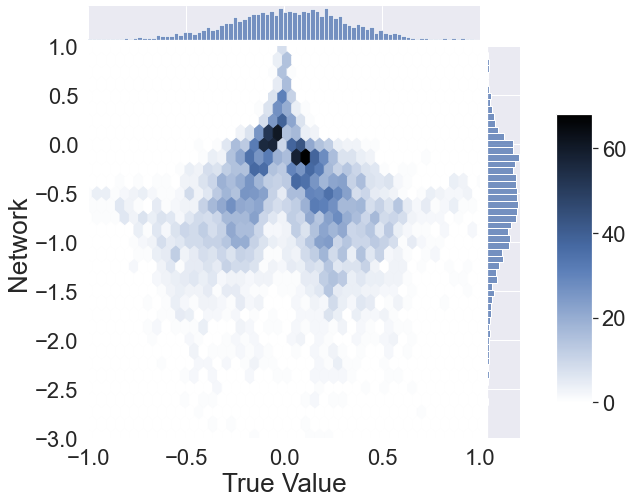

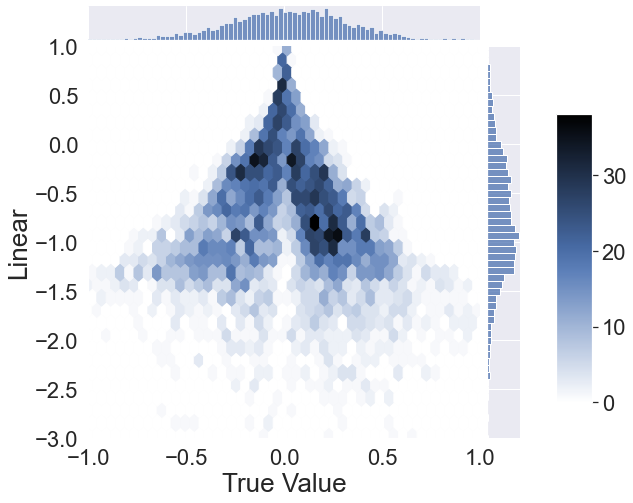

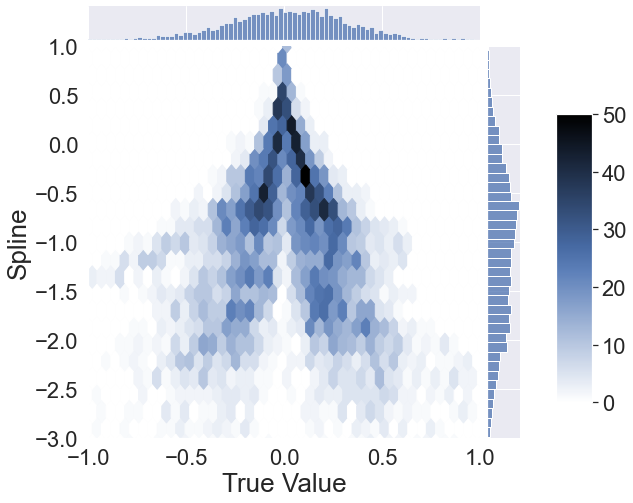

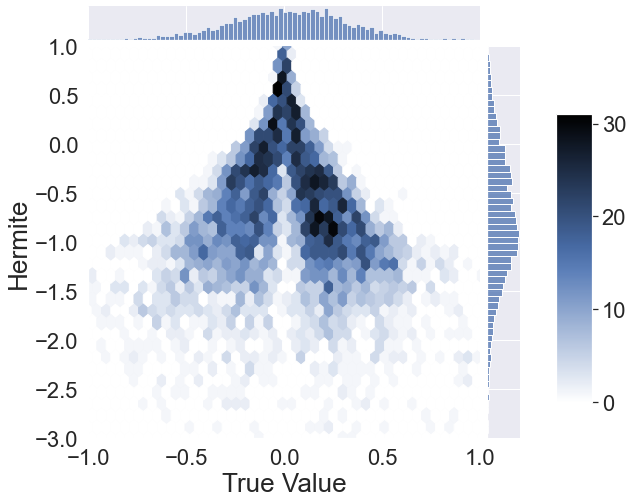

results/2in_3out/x_vx_Mvir_to_x_10layers_100neurons_relu_BatchNorm_RE_1e-3lr_1000Epoch_Standardization_After_acc_trainMvir1e+8_testMvir1e+7_1/
parameter : x


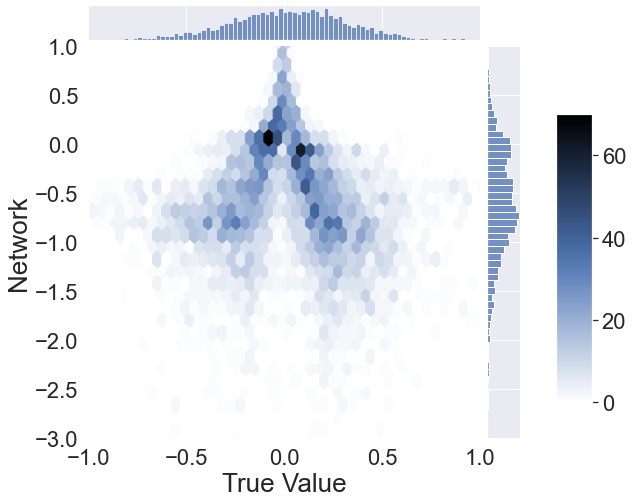

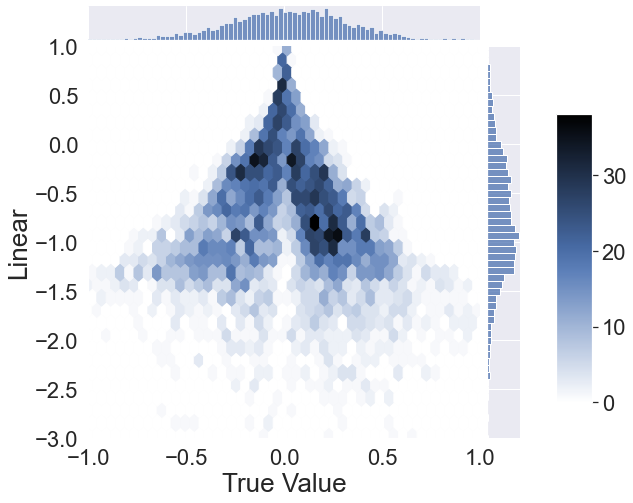

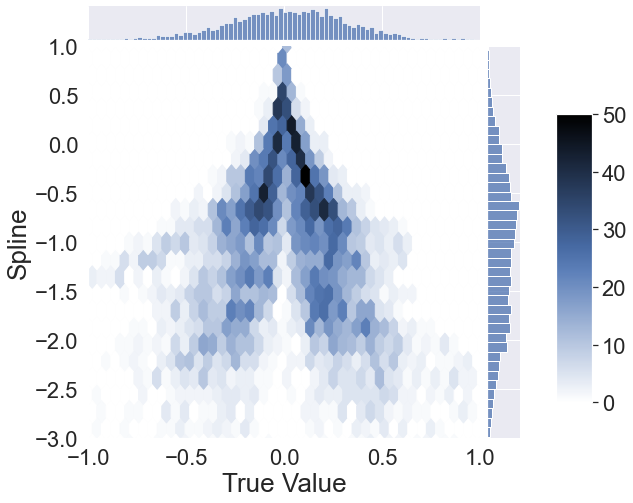

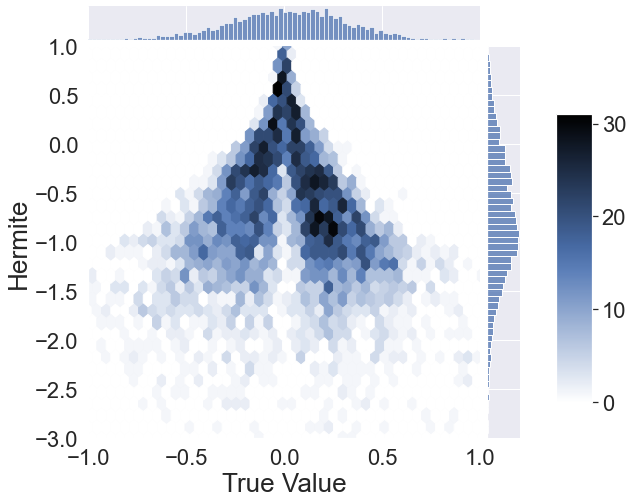

In [12]:
plot_dir = {"Sample(TanhExp)":1, "Sample(ReLU)":2} ## key:title, value:index of dir_list

for title, dir_idx in plot_dir.items():
    direc = dir_list[dir_idx]
    print(direc)
    with open("../" + direc + "interpolate_array.pickle", mode = "rb") as f:
        interp      = pickle.load(f)
        parameter   = list(interp.keys())
        for p_key in parameter:
            print("parameter : {0}".format(p_key))
            for num in interp[p_key].keys():
                if num == 0:    continue
                xlim = [-0.6, 0.6] if num == 0 else [-1.0, 1.0]
                methods = list(interp[p_key][num].keys())
                plot_true_vs_error(interp[p_key][num], methods, xlim=xlim)

results/2in_3out/x_vx_Mvir_to_x_10layers_100neurons_tanhexp_BatchNorm_RE_1e-3lr_1000Epoch_Standardization_After_acc_trainMvir1e+8_testMvir1e+7_1/
Model[0]


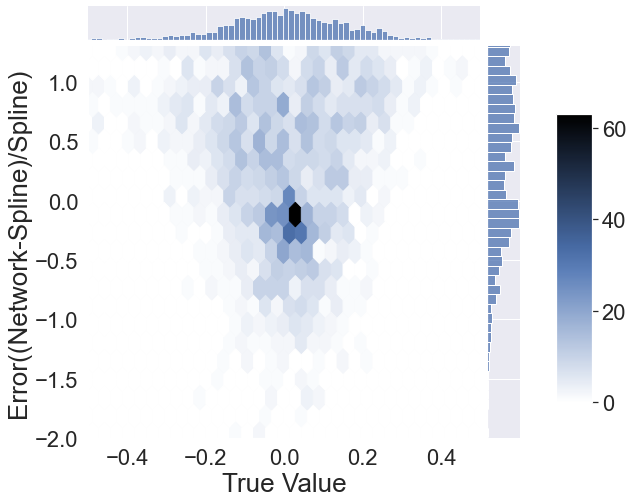

Model[1]


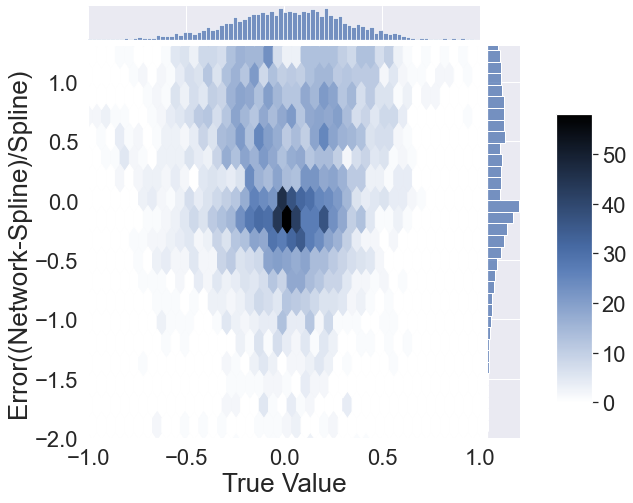

results/2in_3out/x_vx_Mvir_to_x_10layers_100neurons_relu_BatchNorm_RE_1e-3lr_1000Epoch_Standardization_After_acc_trainMvir1e+8_testMvir1e+7_1/
Model[0]


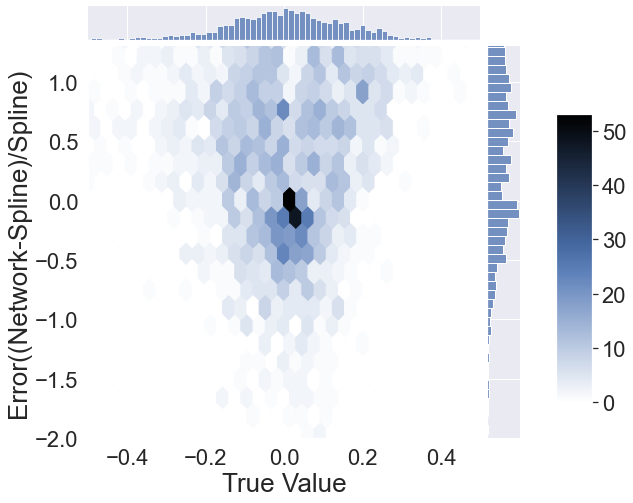

Model[1]


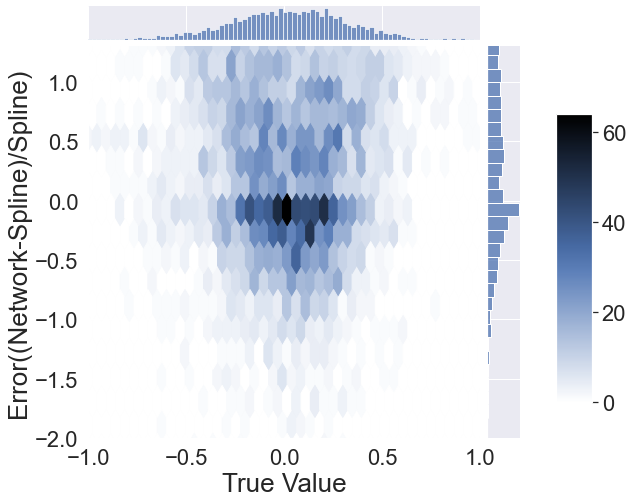

In [14]:
plot_dir = {"Sample(TanhExp)":1, "Sample(ReLU)":2} ## key:title, value:index of dir_list

for title, dir_idx in plot_dir.items():
    direc = dir_list[dir_idx]
    print(direc)
    with open("../" + direc + "interpolate_array.pickle", mode = "rb") as f:
        interp = pickle.load(f)
        for p_key in interp.keys():
            for num in interp[p_key].keys():
                print("Model[{num}]".format(num=num))
                xlim = [-0.5, 0.5] if num == 0 else [-1, 1]
                plot_relerr_to_true_value(interp[p_key][num], xlim=xlim, ylim=[-2, 1.3])